In [1]:
from tkinter import messagebox
from tkinter import*
from tkinter import simpledialog
import tkinter
from tkinter import filedialog
from tkinter.filedialog import askopenfilename
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgbm
import pandas as pd
from imblearn.over_sampling import SMOTE
from tensorflow.keras.utils import to_categorical
from keras.layers import MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D
from keras.models import Sequential
from keras.models import model_from_json
import pickle
global filename
global X,Y
global classifier
global dataset
global X_train, X_test, y_train, y_test
accuracy = []
precision = []
recall = []
fscore = []
global le
import warnings
warnings.simplefilter('ignore')

C:\Users\gokul\AppData\Local\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [52]:
dataset=pd.read_csv("foreveralone.csv")

In [53]:
dataset.head()

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,5/17/2016 20:40,Male,Straight,29,"$75,000 to $99,999",caucasian,Normal weight,Yes,No,Yes but I haven't,1.0,Yes,Yes,Set me up with a date,No,Employed for wages,Surveyor,"High school graduate, diploma or the equivalen...",Other exercise
1,5/17/2016 20:41,Male,Straight,32,"$10,000 to $19,999",White non-Hispanic,Normal weight,Yes,Yes,No,10.0,Yes,Yes,"Set me up with a date, date coaching",No,Employed for wages,Part time computer Tutor,Bachelor’s degree,"Joined a gym/go to the gym, Therapy"
2,5/17/2016 20:42,Female,Straight,20,"$1 to $10,000",White non-Hispanic,Normal weight,Yes,No,No,8.0,Yes,Yes,I don't want help,No,A student,Student,"Some college, no degree",join clubs/socual clubs/meet ups
3,5/17/2016 20:42,Male,Straight,24,$0,Hispanic (of any race),Normal weight,Yes,No,No,40.0,Yes,Yes,Set me up with a date,No,A student,student,"Some high school, no diploma","Joined a gym/go to the gym, Other exercise"
4,5/17/2016 20:44,Male,Straight,20,"$1 to $10,000",White non-Hispanic,Normal weight,Yes,No,No,10.0,No,No,I don't want help,No,A student,Kitchen staff,Bachelor’s degree,NaN


In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time                   450 non-null    object 
 1   gender                 450 non-null    object 
 2   sexuallity             450 non-null    object 
 3   age                    450 non-null    int64  
 4   income                 450 non-null    object 
 5   race                   450 non-null    object 
 6   bodyweight             450 non-null    object 
 7   virgin                 450 non-null    object 
 8   prostitution_legal     450 non-null    object 
 9   pay_for_sex            450 non-null    object 
 10  friends                450 non-null    float64
 11  social_fear            450 non-null    object 
 12  depressed              450 non-null    object 
 13  what_help_from_others  450 non-null    object 
 14  attempt_suicide        450 non-null    object 
 15  employ

In [57]:
dataset.describe(include='all')

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
count,450,450,450,450.000000,450,450,450,450,450,450,450.000000,450,450,450,450,450,426,450,348
unique,411,4,3,NaN,13,24,4,2,2,3,NaN,2,2,49,2,9,265,9,59
top,5/18/2016 1:55,Male,Straight,NaN,$0,White non-Hispanic,Normal weight,Yes,No,No,NaN,Yes,Yes,I don't want help,No,A student,Student,"Some college, no degree",Other exercise
freq,3,378,398,NaN,157,322,260,337,345,307,NaN,295,296,217,372,170,46,131,50
mean,NaN,NaN,NaN,23.955556,NaN,NaN,NaN,NaN,NaN,NaN,8.066000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,6.073989,NaN,NaN,NaN,NaN,NaN,NaN,35.070598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### process dataset

In [5]:
label=dataset.groupby("attempt_suicide")

In [6]:
label.size()

attempt_suicide
No     372
Yes     78
dtype: int64

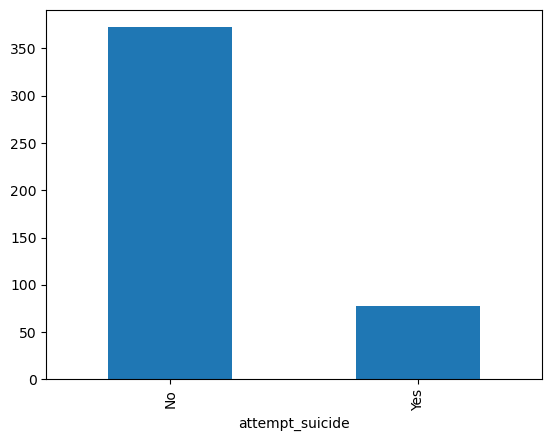

In [7]:
label = dataset.groupby('attempt_suicide').size()
label.plot(kind="bar")
plt.show()

In [8]:
dataset.isnull().sum()

time                       0
gender                     0
sexuallity                 0
age                        0
income                     0
race                       0
bodyweight                 0
virgin                     0
prostitution_legal         0
pay_for_sex                0
friends                    0
social_fear                0
depressed                  0
what_help_from_others      0
attempt_suicide            0
employment                 0
job_title                 24
edu_level                  0
improve_yourself_how     102
dtype: int64

In [58]:
dataset.fillna(0,inplace=True)

In [59]:
dataset.isnull().sum()

time                     0
gender                   0
sexuallity               0
age                      0
income                   0
race                     0
bodyweight               0
virgin                   0
prostitution_legal       0
pay_for_sex              0
friends                  0
social_fear              0
depressed                0
what_help_from_others    0
attempt_suicide          0
employment               0
job_title                0
edu_level                0
improve_yourself_how     0
dtype: int64

In [60]:
dataset.drop(['time'], axis = 1,inplace=True)
dataset.drop(['income'], axis = 1,inplace=True)

In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 450 non-null    object 
 1   sexuallity             450 non-null    object 
 2   age                    450 non-null    int64  
 3   race                   450 non-null    object 
 4   bodyweight             450 non-null    object 
 5   virgin                 450 non-null    object 
 6   prostitution_legal     450 non-null    object 
 7   pay_for_sex            450 non-null    object 
 8   friends                450 non-null    float64
 9   social_fear            450 non-null    object 
 10  depressed              450 non-null    object 
 11  what_help_from_others  450 non-null    object 
 12  attempt_suicide        450 non-null    object 
 13  employment             450 non-null    object 
 14  job_title              450 non-null    object 
 15  edu_le

In [13]:
#dataset.drop(['age'], axis = 1,inplace=True)
#friends,age,

In [64]:
cols =['gender','sexuallity','age','race','bodyweight','virgin','prostitution_legal','pay_for_sex','friends','social_fear','depressed','what_help_from_others','attempt_suicide','employment','job_title','edu_level','improve_yourself_how']
#spelling depressed !!!

In [65]:
le = LabelEncoder()
for i in range(0,len(cols)):
    dataset[cols[i]] = pd.Series(le.fit_transform(dataset[cols[i]].astype(str)))

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   gender                 450 non-null    int32
 1   sexuallity             450 non-null    int32
 2   age                    450 non-null    int32
 3   race                   450 non-null    int32
 4   bodyweight             450 non-null    int32
 5   virgin                 450 non-null    int32
 6   prostitution_legal     450 non-null    int32
 7   pay_for_sex            450 non-null    int32
 8   friends                450 non-null    int32
 9   social_fear            450 non-null    int32
 10  depressed              450 non-null    int32
 11  what_help_from_others  450 non-null    int32
 12  attempt_suicide        450 non-null    int32
 13  employment             450 non-null    int32
 14  job_title              450 non-null    int32
 15  edu_level              450 non-null    i

In [66]:
dataset.describe(include="all")

,gender,sexuallity,age,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,0.857778,1.784444,10.840000,13.886667,0.920000,0.748889,0.233333,0.588889,10.860000,0.655556,0.657778,17.853333,0.173333,2.462222,136.117778,3.882222,23.322222
std,0.391723,0.608205,5.462258,7.080388,1.155138,0.434135,0.423423,0.886605,9.034724,0.475716,0.474982,14.821155,0.378956,1.887633,80.574203,2.386281,17.585064
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,7.000000,8.000000,0.000000,0.250000,0.000000,0.000000,3.000000,0.000000,0.000000,5.000000,0.000000,1.000000,59.250000,1.000000,8.000000
50%,1.000000,2.000000,10.000000,18.000000,0.000000,1.000000,0.000000,0.000000,13.000000,1.000000,1.000000,7.500000,0.000000,2.000000,156.500000,3.000000,21.000000
75%,1.000000,2.000000,13.000000,18.000000,2.000000,1.000000,0.000000,2.000000,19.000000,1.000000,1.000000,36.000000,0.000000,3.000000,198.750000,6.000000,35.000000
max,3.000000,2.000000,34.000000,23.000000,3.000000,1.000000,1.000000,2.000000,29.000000,1.000000,1.000000,48.000000,1.000000,8.000000,265.000000,8.000000,59.000000


In [74]:
dataset['age'].unique()

array([16, 19,  7, 11,  8,  4, 15,  6, 12, 10, 13,  5, 32, 22,  9, 20,  3,
       25, 30, 17,  2, 21, 34,  0, 23, 18, 14, 33, 29, 27, 24, 26,  1, 31,
       28])

<Axes: >

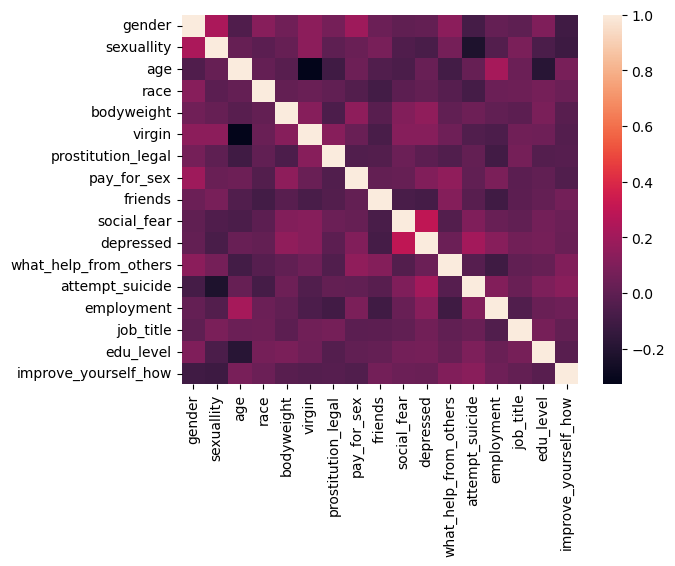

In [71]:
import seaborn as sns
sns.heatmap(dataset.corr())


In [17]:
Y = dataset.values[:,12]
dataset.drop("attempt_suicide",axis=1,inplace=True)

In [18]:
X=dataset.values

In [19]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [77]:
print(X[0])

[  1   2  16  19   0   1   0   2   3   1   1  18   2 174   3  35]


In [22]:
sm = SMOTE(random_state = 42,k_neighbors=1)
X, Y = sm.fit_resample(X, Y)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [24]:
XX = X.reshape(X.shape[0],X.shape[1],1,1)
YY = to_categorical(Y)
X_train1 = X_train.reshape(X_train.shape[0],X_train.shape[1],1,1)
X_test1 = X_test.reshape(X_test.shape[0],X_test.shape[1],1,1)
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

classifier = Sequential()

# First Convolution Layer with 'same' padding and Pooling
classifier.add(Conv2D(32, (1, 1), input_shape=(X_train1.shape[1], X_train1.shape[2], X_train1.shape[3]), activation='relu', padding='same'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(1, 1)))

# Second Convolution Layer with 'same' padding and Pooling
classifier.add(Conv2D(32, (1, 1), activation='relu', padding='same'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(1, 1)))

# Flattening
classifier.add(Flatten())

# Fully Connected Layer with Dropout
classifier.add(Dense(units=256, activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.2))

# Output Layer
classifier.add(Dense(units=y_train1.shape[1], activation='softmax'))

# Print the summary
print(classifier.summary())


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import KFold

# Prepare data
sm = SMOTE(random_state=42, k_neighbors=2)
X, Y = sm.fit_resample(X, Y)

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Reshape data for CNN input
X_train1 = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test1 = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

# Define the model
classifier = Sequential()
classifier.add(Conv2D(32, (1, 1), input_shape=(X_train1.shape[1], X_train1.shape[2], X_train1.shape[3]), activation='relu', padding='same'))
#classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(1, 1)))
classifier.add(Conv2D(32, (1, 1), activation='relu', padding='same'))
#classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(1, 1)))
classifier.add(Flatten())
classifier.add(Dense(units=256, activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=y_train1.shape[1], activation='softmax'))

# Print the summary
print(classifier.summary())

# Initialize early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Initialize metrics
accuracy = []
precision = []
recall = []
fscore = []

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(X_train1):
    X_train_fold, X_val_fold = X_train1[train_index], X_train1[val_index]
    y_train_fold, y_val_fold = y_train1[train_index], y_train1[val_index]
    
    # Compile and train the model
    classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    classifier.fit(X_train_fold, y_train_fold, batch_size=16, epochs=10, shuffle=True, verbose=1, 
                   validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])
    
    # Predict on the validation set
    predict = classifier.predict(X_val_fold)
    predict = np.argmax(predict, axis=1)
    y_val_fold = np.argmax(y_val_fold, axis=1)
    
    # Calculate metrics
    a = accuracy_score(y_val_fold, predict) * 100
    p = precision_score(y_val_fold, predict, average='macro') * 100
    r = recall_score(y_val_fold, predict, average='macro') * 100
    f = f1_score(y_val_fold, predict, average='macro') * 100
    
    # Append metrics to respective lists
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)

# Print average metrics from cross-validation
print(f'Cross-Validation Accuracy: {np.mean(accuracy):.2f}%')
print(f'Cross-Validation Precision: {np.mean(precision):.2f}%')
print(f'Cross-Validation Recall: {np.mean(recall):.2f}%')
print(f'Cross-Validation F1 Score: {np.mean(fscore):.2f}%')

# Evaluate on the test set
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
classifier.fit(X_train1, y_train1, batch_size=16, epochs=10, shuffle=True, verbose=1, callbacks=[early_stopping])

# Predict on the test set
predict_test = classifier.predict(X_test1)
predict_test = np.argmax(predict_test, axis=1)
y_test1 = np.argmax(y_test1, axis=1)

# Calculate test set metrics
test_accuracy = accuracy_score(y_test1, predict_test) * 100
test_precision = precision_score(y_test1, predict_test, average='macro') * 100
test_recall = recall_score(y_test1, predict_test, average='macro') * 100
test_fscore = f1_score(y_test1, predict_test, average='macro') * 100

# Print test set metrics
print(f'Test Set Accuracy: {test_accuracy:.2f}%')
print(f'Test Set Precision: {test_precision:.2f}%')
print(f'Test Set Recall: {test_recall:.2f}%')
print(f'Test Set F1 Score: {test_fscore:.2f}%')


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 16, 1, 32)           │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 1, 32)           │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,962 (519.38 KB)

 Trainable params: 132,962 (519.38 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5658 - loss: 1.5248 - val_accuracy: 0.6218 - val_loss: 0.7865
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6040 - loss: 1.1903 - val_accuracy: 0.5630 - val_loss: 0.8007
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6033 - loss: 0.8256 - val_accuracy: 0.6303 - val_loss: 0.6182
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6647 - loss: 0.7117 - val_accuracy: 0.7479 - val_loss: 0.5564
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6823 - loss: 0.6163 - val_accuracy: 0.8235 - val_loss: 0.5209
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6740 - loss: 0.6575 - val_accuracy: 0.7899 - val_loss: 0.5182
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7397 - loss: 0.5285 - val_accuracy: 0.7899 - val_loss: 0.5044
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7144 - loss: 0.5658 - val_accuracy: 0.7983 -

# Prediction feed (incomplete)

In [27]:
from joblib import Parallel, delayed 
import joblib 
joblib.dump(classifier,"Model_classifier.pkl")


['Model_classifier.pkl']

In [119]:
cols =['gender','sexuallity','age','race','bodyweight','virgin','prostitution_legal','pay_for_sex','friends','social_fear','depressed','what_help_from_others','employment','job_title','edu_level','improve_yourself_how']
len(cols)

16

In [165]:
testData=pd.read_csv("foreveralone.csv")
print(len(testData))
testData.fillna(0, inplace = True)
testData.drop(['time'], axis = 1,inplace=True)
testData.drop(['income'], axis = 1,inplace=True)
#testData.drop(['age'], axis = 1,inplace=True)
#testData.drop(['friends'], axis = 1,inplace=True)
y=testData['attempt_suicide']
testData.drop(['attempt_suicide'], axis = 1,inplace=True)

450


In [126]:
data = {
    'gender': ['Male'],
    'sexuallity': ['Straight'],
    'age':29,
    'race': ["caucasian"],
    'bodyweight': ['Normal weight'],
    'virgin': ['Yes'],
    'prostitution_legal': ['No'],
    'pay_for_sex': ["Yes but I haven't"],
    'friends':1,
    'social_fear': "Yes",
    'depressed': ['Yes'],
    'what_help_from_others': ["Set me up with a date"],
    'employment': ['Employed for wages'],
    'job_title': ['Surveyor'],
    'edu_level': ["High school graduate, diploma or the equivalent (for example: GED)"],
    'improve_yourself_how': ['Other exercise']
}
testData=pd.DataFrame(data)

In [145]:
testData.columns

Index(['gender', 'sexuallity', 'age', 'race', 'bodyweight', 'virgin',
       'prostitution_legal', 'pay_for_sex', 'friends', 'social_fear',
       'depressed', 'what_help_from_others', 'employment', 'job_title',
       'edu_level', 'improve_yourself_how'],
      dtype='object')

In [146]:
len(testData.columns)

16

In [166]:
testData.isnull().sum()

gender                   0
sexuallity               0
age                      0
race                     0
bodyweight               0
virgin                   0
prostitution_legal       0
pay_for_sex              0
friends                  0
social_fear              0
depressed                0
what_help_from_others    0
employment               0
job_title                0
edu_level                0
improve_yourself_how     0
dtype: int64

In [148]:
testData.dropna(inplace=True)

In [154]:
len(testData)

17

In [141]:
cols =['gender','sexuallity','age','race','bodyweight','virgin','prostitution_legal','pay_for_sex','friends','social_fear','depressed','what_help_from_others','employment','job_title','edu_level','improve_yourself_how']
len(cols)

16

In [131]:
testData.info()
#[  1   2  16  19   0   1   0   2   3   1   1  18   2 174   3  35]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 1 non-null      object
 1   sexuallity             1 non-null      object
 2   age                    1 non-null      int64 
 3   race                   1 non-null      object
 4   bodyweight             1 non-null      object
 5   virgin                 1 non-null      object
 6   prostitution_legal     1 non-null      object
 7   pay_for_sex            1 non-null      object
 8   friends                1 non-null      int64 
 9   social_fear            1 non-null      object
 10  depressed              1 non-null      object
 11  what_help_from_others  1 non-null      object
 12  employment             1 non-null      object
 13  job_title              1 non-null      object
 14  edu_level              1 non-null      object
 15  improve_yourself_how   1 no

In [151]:
la = LabelEncoder()
for i in range(0,len(testData.columns)):
    testData[cols[i]] = pd.Series(la.fit_transform(testData[cols[i]].astype(str)))

In [85]:
testData

,gender,sexuallity,age,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,employment,job_title,edu_level,improve_yourself_how
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
testData['friends']=testData['friends'].astype("float32")
testData['age']=testData['age'].astype("float32")

In [118]:
print(testData.shape)

(1, 16)


In [132]:
[print(i.shape, i.dtype) for i in classifier.inputs]
[print(o.shape, o.dtype) for o in classifier.outputs]
[print(l.name, l.input_shape, l.dtype) for l in classifier.layers]

(None, 16, 1, 1) float32
(None, 2) float32


AttributeError: 'Conv2D' object has no attribute 'input_shape'

In [133]:
import tensorflow as tf

In [136]:
testData["gender"]=testData["gender"].replace({'Male':1,"Female":0})
testData["sexuallity"]=testData["sexuallity"].replace({'Straight':2})
testData = tf.convert_to_tensor(testData)
testData.shape()

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [160]:
testData

,gender,sexuallity,age,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,employment,job_title,edu_level,improve_yourself_how
1,1.0,2.0,4.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,13.0,3.0,7.0
2,1.0,2.0,1.0,2.0,1.0,1.0,1.0,0.0,8.0,1.0,1.0,3.0,0.0,12.0,3.0,2.0
3,1.0,2.0,6.0,2.0,0.0,1.0,0.0,1.0,4.0,1.0,1.0,3.0,1.0,11.0,0.0,6.0
5,1.0,2.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,10.0,3.0,4.0
7,0.0,2.0,10.0,1.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0,3.0,1.0,6.0,0.0,8.0
8,1.0,2.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,4.0,3.0,3.0
9,1.0,2.0,6.0,2.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,5.0,0.0,8.0,3.0,5.0
10,1.0,2.0,4.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,7.0,1.0,9.0,0.0,0.0
11,1.0,2.0,5.0,2.0,2.0,1.0,1.0,0.0,7.0,0.0,1.0,2.0,4.0,8.0,1.0,10.0
12,0.0,2.0,9.0,3.0,0.0,1.0,0.0,1.0,6.0,1.0,1.0,9.0,2.0,5.0,0.0,1.0


In [158]:
testData.dropna(inplace=True)

In [159]:
X_test_final = testData.values.reshape(testData.shape[0], testData.shape[1], 1, 1)

# Predict using the model
predict = classifier.predict(X_test_final)
predict = np.argmax(predict, axis=1)

# Print the predictions
print(len(predict))
op=pd.DataFrame(predict)
for i in range(len(predict)):
    if predict[i] == 1:
        print("suicide")
    else:
        print("Not suicide")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
13
Not suicide
Not suicide
Not suicide
suicide
Not suicide
Not suicide
Not suicide
Not suicide
Not suicide
suicide
Not suicide
Not suicide
Not suicide


In [134]:
y=y.replace({'Yes':1,"No":0})

In [142]:
y=pd.DataFrame(y)

In [144]:
y.merge(op,how="outer")

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

,0,attempt_suicide
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [ ]:
dataset.drop("attempt_suicide",axis=1,inplace=True)

In [126]:
data = {
    'gender': ['Male'],
    'sexuallity': ['Straight'],
    'race': ['White non-Hispanic'],
    'bodyweight': ['Normal weight'],
    'virgin': ['No'],
    'prostitution_legal': ['Yes'],
    'pay_for_sex': ['No'],
    'social_fear': [3],
    'depressed': ['No'],
    'what_help_from_others': ["I don't want help"],
    'employment': ['Employed for wages'],
    'job_title': ['Guy'],
    'edu_level': ['Trade/technical/vocational training'],
    'improve_yourself_how': ['Joined a gym/go to the gym']
}
testData=pd.DataFrame(data)


In [118]:
testData.fillna(0, inplace = True)


predict = classifier.predict(data)
predict = np.argmax(predict, axis=1)
print(predict)
for i in range(len(predict)):
    if predict[i] == 1:
        print("suicide")
        #text.insert(END,str(temp[i])+" ====> SUICIDAL Depression Detected\n\n")
    if predict[i] == 0:
        print("Not suicide")
        #text.insert(END,str(temp[i])+" ====> NO SUICIDAL Depression Detected\n\n")

ValueError: Unrecognized data type: x={'Gender': ['Male'], 'Sexuality': ['Straight'], 'Age': [24], 'Race': ['White non-Hispanic'], 'Bodyweight': ['Normal weight'], 'Virgin': ['No'], 'Prostitution_Legal': ['Yes'], 'Pay_For_Sex': ['No'], 'Social_Fear': [3], 'Depressed': ['No'], 'What_Help_From_Others': ["I don't want help"], 'Employment': ['Employed for wages'], 'Job_Title': ['Guy'], 'Edu_Level': ['Trade/technical/vocational training'], 'Improve_Yourself_How': ['Joined a gym/go to the gym']} (of type <class 'dict'>)